The Affordability Gap: A Data-Driven Case for Childcare Reform

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import matplotlib.dates as mdates

In [2]:
print(os.getcwd())

/Users/Bellevue/DSC530/miniconda3/envs/book_env/DSC 640


### EDA

In [3]:
#load flat file dataset & select columns needed for analysis
childcare_prices = pd.read_excel('/Users/Bellevue/DSC530/miniconda3/envs/book_env/DSC 640/nationaldatabaseofchildcareprices.xlsx')

In [4]:
childcare_prices.head()

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,87.39,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,91.33,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,95.28,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,99.22,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0


In [5]:
# Count of rows & columns
childcare_prices.shape

(34567, 227)

In [6]:
# Verify the datatypes
childcare_prices.dtypes

State_Name               object
State_Abbreviation       object
County_Name              object
County_FIPS_Code          int64
StudyYear                 int64
                         ...   
_75FCCInfant_flag       float64
_75FCCToddler           float64
_75FCCToddler_flag      float64
_75FCCPreschool         float64
_75FCCPreschool_flag    float64
Length: 227, dtype: object

In [7]:
# Get a count of missing values by column - may need to impute later 
missing_data = childcare_prices.isnull().sum().sort_values(ascending = False)
print(missing_data[missing_data>0])

iMFCC12to17           11204
iMFCCBto5             11204
iMFCC54toSA           11204
iMFCC48to53           11204
iMFCC42to47           11204
                      ...  
_75CPreschool_flag    10974
_75CSA                10974
MC6to11               10974
H_6to17_SingleM           2
H_Under6_SingleM          2
Length: 114, dtype: int64


In [8]:
# Summary stats
childcare_prices.describe()

,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,MUNR_20to64,FLFPR_20to64,FLFPR_20to64_Under6,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
count,34567.000000,34567.000000,34567.000000,34567.00000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,34567.000000,...,23383.000000,23383.000000,23383.000000,23383.000000,23383.000000,23383.000000,23383.000000,23383.00000,23383.000000,23383.000000
mean,30388.132786,2012.999711,7.465902,7.02902,7.860291,6.900073,6.482007,7.275457,70.086125,68.821409,...,106.759749,1.153359,104.189510,1.287859,128.909289,1.792841,120.784283,1.18800,117.897482,1.294316
std,15161.015383,3.162232,3.538619,3.56342,4.037657,3.446199,3.477956,3.990758,7.696499,11.758088,...,29.982431,0.532176,28.961701,0.696762,38.543010,0.818080,35.334666,0.58367,34.111188,0.708542
min,1001.000000,2008.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,33.600000,0.000000,...,43.080000,1.000000,40.030000,1.000000,50.000000,1.000000,50.000000,1.00000,46.450000,1.000000
25%,18177.000000,2010.000000,5.100000,4.64000,5.200000,4.600000,4.200000,4.700000,65.100000,62.600000,...,85.085000,1.000000,84.255000,1.000000,100.830000,1.000000,95.850000,1.00000,95.000000,1.000000
50%,29177.000000,2013.000000,7.050000,6.59000,7.390000,6.500000,6.000000,6.800000,70.600000,69.600000,...,100.250000,1.000000,99.650000,1.000000,123.150000,2.000000,115.000000,1.00000,112.500000,1.000000
75%,45081.000000,2016.000000,9.350000,8.88000,9.920000,8.700000,8.250000,9.200000,75.500000,76.100000,...,124.950000,1.000000,120.200000,1.000000,146.950000,3.000000,136.270000,1.00000,132.760000,1.000000
max,56045.000000,2018.000000,36.110000,38.24000,39.740000,33.900000,44.500000,45.500000,100.000000,100.000000,...,376.320000,3.000000,331.340000,3.000000,502.970000,3.000000,439.220000,3.00000,386.720000,3.000000


## Milestone #1

In [9]:
childcare_prices['MHI'].dtypes

dtype('float64')

In [10]:
# Convert the median household income column to numeric to handling potential errors
childcare_prices['MHI'] = pd.to_numeric(childcare_prices['MHI'], errors='coerce')

In [11]:
# Calculate the average monthly childcare (center-based) cost across different age groups
cost_columns = ['MCInfant', 'MCToddler', 'MCPreschool']
ccp_clean = childcare_prices.dropna(subset=cost_columns + ['MHI'])

In [12]:
# Calculate the mean of the cost columns for each row
ccp_clean.loc[:, 'Avg_Monthly_Cost'] = ccp_clean[cost_columns].mean(axis=1)

/var/folders/rm/9b6561r12137sm0p138y31940000gn/T/ipykernel_22255/1152805589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccp_clean.loc[:, 'Avg_Monthly_Cost'] = ccp_clean[cost_columns].mean(axis=1)


In [13]:
ccp_clean.head()

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag,Avg_Monthly_Cost
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0,98.606667
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0,99.270000
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0,99.940000
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0,100.610000
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0,101.273333


In [14]:
# Calculate the annual (center-based) childcare cost
ccp_clean.loc[:,'Annual_Cost'] = ccp_clean['Avg_Monthly_Cost'] * 12
ccp_clean.head()

/var/folders/rm/9b6561r12137sm0p138y31940000gn/T/ipykernel_22255/458720738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ccp_clean.loc[:,'Annual_Cost'] = ccp_clean['Avg_Monthly_Cost'] * 12


,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag,Avg_Monthly_Cost,Annual_Cost
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0,98.606667,1183.28
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0,99.270000,1191.24
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0,99.940000,1199.28
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0,100.610000,1207.32
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0,101.273333,1215.28


In [15]:
# Filter results down to the latest year
latest_yr = ccp_clean['StudyYear'].max()
ccp_latest = ccp_clean[ccp_clean['StudyYear'] == latest_yr].copy()

In [16]:
# Select the relevant columns: State, Infant Care Cost (MCInfant), and Median Household Income (MHI)
# Drop any rows where these critical values are missing
inf_analysis = ccp_latest[['State_Name', 'MCInfant', 'MHI']].dropna(subset=['MCInfant'])
# Calculate the annual cost of infant care
inf_analysis['Annual_Cost_Infant'] = inf_analysis['MCInfant'] * 52

In [17]:
# Group by state and calculate the median of both the annual cost and the household income.
state_costs = inf_analysis.groupby('State_Name').agg({
    'Annual_Cost_Infant': 'median',
    'MHI': 'median'
}).reset_index()

In [18]:
# Calculate the affordability percentage
state_costs['Affordability_Pct'] = (state_costs['Annual_Cost_Infant'] / state_costs['MHI']) * 100
state_costs.head()

,State_Name,Annual_Cost_Infant,MHI,Affordability_Pct
0,Alabama,6261.32,40978.0,15.279711
1,Alaska,17483.96,82306.0,21.242631
2,Arizona,9230.00,48649.0,18.972641
3,Arkansas,5135.00,39752.0,12.917589
4,California,15057.64,59157.5,25.453476


In [19]:
# Sort by the least affordable states
state_level_sorted = state_costs.sort_values(by='Affordability_Pct', ascending=False)
state_level_sorted.head()

,State_Name,Annual_Cost_Infant,MHI,Affordability_Pct
4,California,15057.64,59157.5,25.453476
37,Washington,12900.16,54852.0,23.518121
14,Massachusetts,15860.00,70922.5,22.362438
7,Hawaii,17999.80,82906.0,21.711094
1,Alaska,17483.96,82306.0,21.242631


In [20]:
print("\n--- Top 5 Least Affordable States for Infant Childcare (using internal data) ---")
print(state_level_sorted.head())


--- Top 5 Least Affordable States for Infant Childcare (using internal data) ---
       State_Name  Annual_Cost_Infant      MHI  Affordability_Pct
4      California            15057.64  59157.5          25.453476
37     Washington            12900.16  54852.0          23.518121
14  Massachusetts            15860.00  70922.5          22.362438
7          Hawaii            17999.80  82906.0          21.711094
1          Alaska            17483.96  82306.0          21.242631


### Visualizations

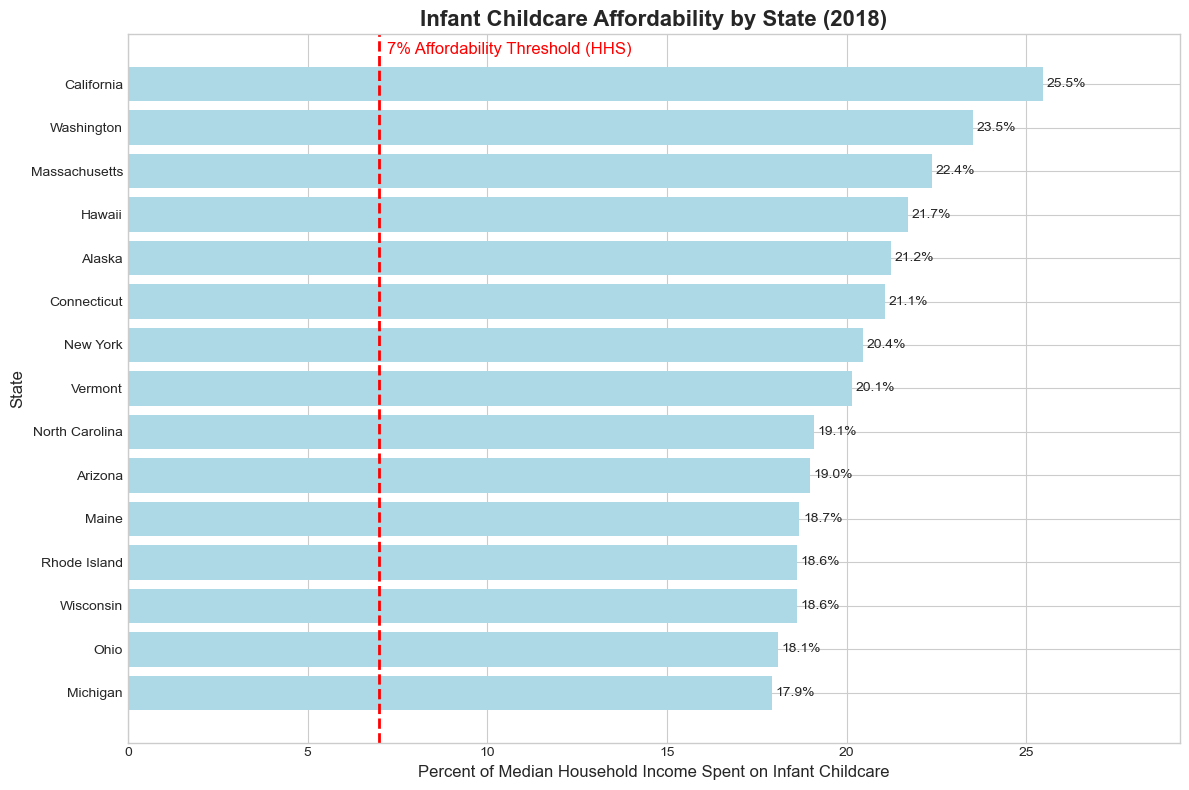

In [21]:
# Get the top 15 least affordable states for the plot
top_15_unaffordable = state_level_sorted.head(15)

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))
# Create the horizontal bar chart
bars = ax.barh(top_15_unaffordable['State_Name'], top_15_unaffordable['Affordability_Pct'], color='lightblue')

# Add the 7% affordability benchmark line from HHS
ax.axvline(x=7, color='red', linestyle='--', linewidth=2)
ax.text(7.2, -0.8, '7% Affordability Threshold (HHS)', color='red', fontsize=12, va='center')

# Add labels and a title
ax.set_xlabel('Percent of Median Household Income Spent on Infant Childcare', fontsize=12)
ax.set_ylabel('State', fontsize=12)
ax.set_title(f'Infant Childcare Affordability by State ({latest_yr})', fontsize=16, fontweight='bold')

# Invert y-axis so the least affordable state at the top
ax.invert_yaxis()

# Add the percentage value as a label on each bar
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
            va='center', ha='left', fontsize=10)

plt.xlim(0, top_15_unaffordable['Affordability_Pct'].max() * 1.15)
plt.tight_layout()


In [22]:
# Ensure numeric columns for cost variables
cost_vars = ["MCBto5", "MCInfant", "MCToddler", "MCPreschool"]
childcare_prices[cost_vars] = childcare_prices[cost_vars].apply(pd.to_numeric, errors="coerce")


In [23]:
# Drop rows with missing values for these costs
cc_costs = childcare_prices.dropna(subset=cost_vars)

In [25]:
# Compute summary statistics for childcare costs
cost_summary = cc_costs[cost_vars].describe()

,MCBto5,MCInfant,MCToddler,MCPreschool
count,23593.000000,23593.000000,23593.000000,23593.000000
mean,145.930609,146.051770,130.482768,122.232852
std,53.722917,53.698566,43.775370,38.538323
min,27.730000,27.730000,21.540000,21.540000
25%,108.450000,108.750000,100.000000,95.880000
50%,134.400000,134.500000,120.990000,113.990000
75%,166.330000,166.330000,148.710000,139.300000
max,470.000000,470.000000,419.000000,385.000000


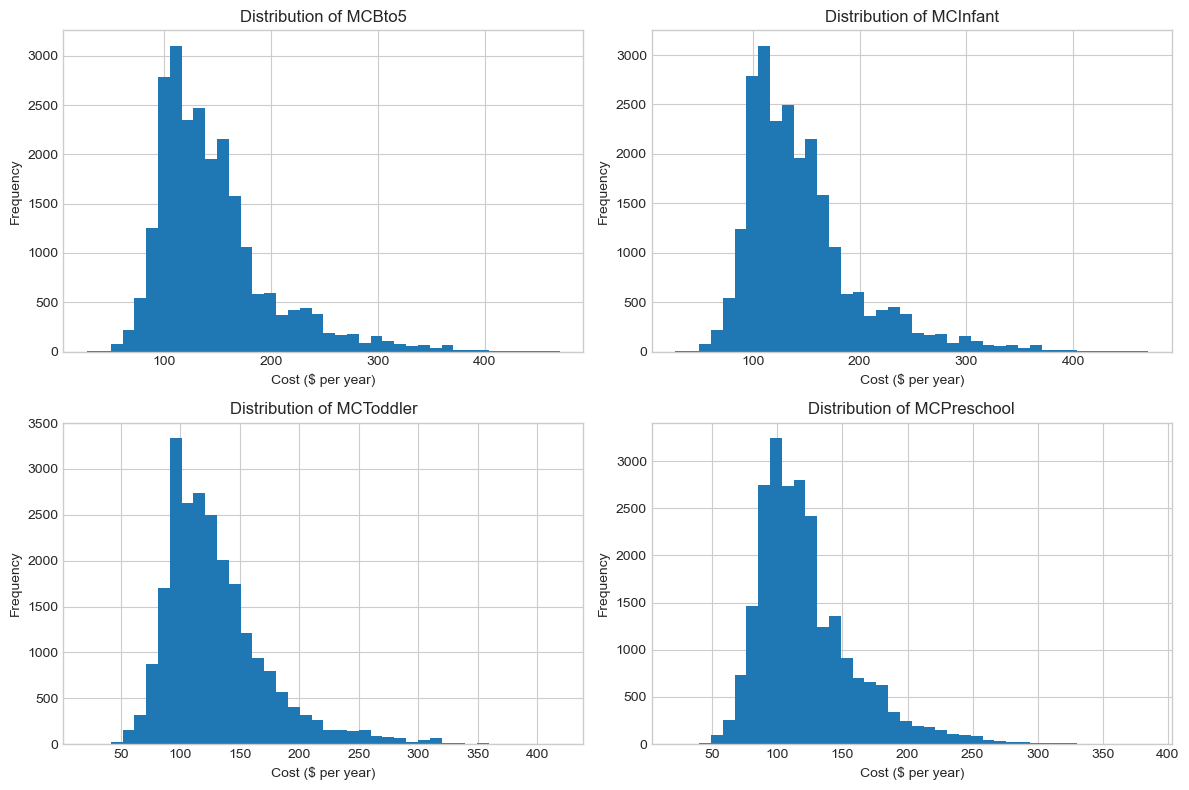

In [26]:
# Plot distribution of childcare costs (histograms)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for i, var in enumerate(cost_vars):
    ax = axes[i // 2, i % 2]
    cc_costs[var].hist(bins=40, ax=ax)
    ax.set_title(f"Distribution of {var}")
    ax.set_xlabel("Cost ($ per year)")
    ax.set_ylabel("Frequency")

plt.tight_layout()

cost_summary

### Initial Insights
* Infant care is the most expensive, followed by toddlers and preschoolers.
* High variability: Standard deviations are large (e.g., \$54 for infants), suggesting big regional/state differences.
* Skewed distributions: Most counties cluster around \$100–\$200/week, but a few areas exceed $400/week.